<a href="https://colab.research.google.com/github/dniggl/Insights/blob/main/Predict_Housing_Prices_Using_Multiple_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Predict housing prices using machine learning.  

In [ ]:
# Import software libraries. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics

In [ ]:
# Load the data into Colab.
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab

Saving housing.csv to housing.csv


In [ ]:
#Store the data into a data frame. 
houses = pd.read_csv('housing.csv')

# Print the first 5 rows
houses.head(5)  

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


This dataset is a modified version of the California Housing dataset available from: Luís Torgo's page (University of Porto).

The data pertains to the houses found in a given California district and some summary statistics about them based on the 1990 census. Each row represents one district in California which typically consists of a population from 600 to 3,000 people. 

The columns and definitions are described below. 

1. Longitude: A measure of how far west a house is; a higher value is farther west.

2. Latitude: A measure of how far north a house is; a higher value is farther north.

3. Housing median age: Median age of a house within a district; a lower number is a newer building.

4. Total Rooms: Total number of rooms within a district.

5. Total Bedrooms: Total number of bedrooms within a district.

6. Population: Total number of people residing within a district.

7. Households: Total number of households, a group of people residing within a home unit, within a district.

8. Median Income: Median income for households within a district of houses (measured in tens of thousands of US Dollars).

9. Median House Value: Median house value for households within a district (measured in US Dollars).

10. Ocean Proximity: Location of the house with reference to the ocean.

**Data Analysis and Exploration**

In [ ]:
# Show information about the data columns.
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20,640 housing records and 10 columns. All of the features are numeric except ocean_proximity which is a categorical variable.  

In [ ]:
# Show each ocean proximity category and the counts within each category.
houses["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Text(0.5, 1.0, 'Counts for Ocean Proximity Classes')

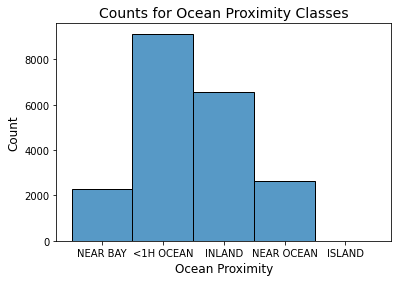

In [ ]:
# Visualize ocean proximity categories and counts. 
sns.histplot(houses['ocean_proximity'])
plt.xlabel('Ocean Proximity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Counts for Ocean Proximity Classes', fontsize=14)

The majority of houses are less than 1 hour from the ocean or are located inland. 

In [ ]:
# Check for NA or missing values in features.
houses.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Total Bedrooms column has 207 fields with null or missing values. 

In [ ]:
# Show statistics for the numerical variables. 
houses.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The average median age of homes within a district is 29 years. The average number of households in a district is 500. The average median income within a district is $38,700. 

The average median house value in a district is $206,856. Keep in mind that these values are from the year 1990.   

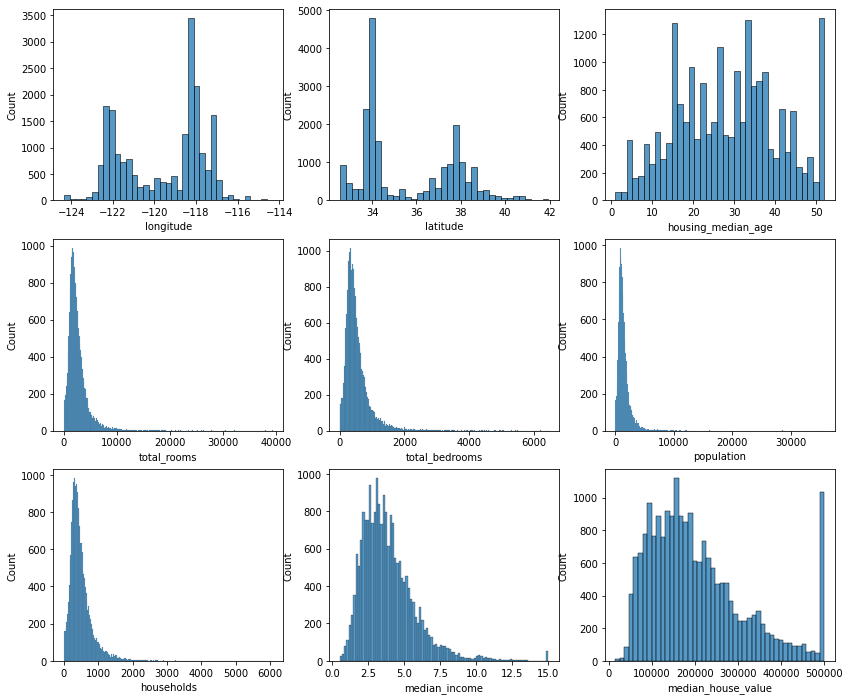

In [ ]:
# Visualize the distribution of all the numerical variables. 
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(14, 12))

plt.subplot(3, 3, 1)
sns.histplot(houses['longitude'])
plt.subplot(3, 3, 2)
sns.histplot(houses['latitude'])
plt.subplot(3, 3, 3)
sns.histplot(houses['housing_median_age'])
plt.subplot(3, 3, 4)
sns.histplot(houses['total_rooms'])
plt.subplot(3, 3, 5)
sns.histplot(houses['total_bedrooms'])
plt.subplot(3, 3, 6)
sns.histplot(houses['population'])
plt.subplot(3, 3, 7)
sns.histplot(houses['households'])
plt.subplot(3, 3, 8)
sns.histplot(houses['median_income'])
plt.subplot(3, 3, 9)
sns.histplot(houses['median_house_value'])

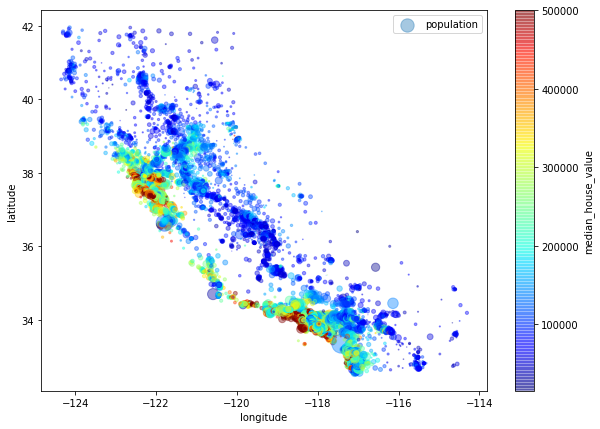

In [ ]:
# Visualize housing prices by population in districts. 
# The circle represents population and color represents prices.

houses.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s = houses["population"]/100, label="population", figsize=(10,7),
            c = "median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()

We see that house prices are very much correlated with locations and dense areas like the Bay area, Los Angeles and San Diego. 

Text(0.5, 1.0, 'Correlation between Median Income and House Value')

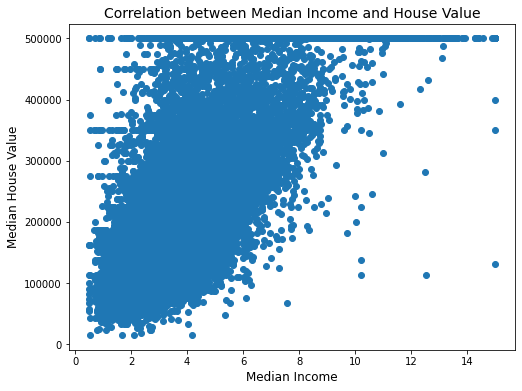

In [ ]:
# Visualize median income in relation to median house value. 
plt.figure(figsize=(8, 6))
plt.scatter(houses.median_income,houses.median_house_value)
plt.xlabel('Median Income', fontsize=12)
plt.ylabel('Median House Value', fontsize=12)
plt.title('Correlation between Median Income and House Value', fontsize=14)

**Data Cleaning**

Total Bedrooms feature has 207 fields with null or missing values. We will replace these null values with the median value.

In [ ]:
# Replace null values in total bedrooms column with the median value.  
houses["total_bedrooms"].fillna(houses["total_bedrooms"].median(),inplace=True)

We need to convert the categorical variable ocean proximity into numbers in preparation for inputting to the machine learning models.

In [ ]:
# Convert ocean proximity catagories into numbers.
houses['ocean_proximity'] = houses['ocean_proximity'].replace(['<1H OCEAN'], 0)
houses['ocean_proximity'] = houses['ocean_proximity'].replace(['INLAND'], 1)
houses['ocean_proximity'] = houses['ocean_proximity'].replace(['NEAR OCEAN'], 2)
houses['ocean_proximity'] = houses['ocean_proximity'].replace(['NEAR BAY'], 3)
houses['ocean_proximity'] = houses['ocean_proximity'].replace(['ISLAND'], 4)
houses.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


Features total rooms and total bedrooms are shown as total number of rooms and total number of bedrooms in each district. We need to convert theses features into number of rooms per household and number of bedrooms per household. Also, population feature is shown as total number of people residing within a district. We need to convert this feature into  population per household. 

In [ ]:
# Create new variables for number of rooms, number of bedrooms and population per household. 
houses["rooms_per_household"] = houses["total_rooms"]/houses["households"]
houses["bedrooms_per_household"] = houses["total_bedrooms"]/houses["total_rooms"]
houses["population_per_household"] = houses["population"]/houses["households"]

In [ ]:
# Drop some columns that are not relevant and show updated table.                                                               
cols = ['total_rooms', 'total_bedrooms','population', 'households']

houses = houses.drop(columns = cols, axis = 1)
houses.head(5)

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
0,-122.23,37.88,41.0,8.3252,452600.0,3,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,8.3014,358500.0,3,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,7.2574,352100.0,3,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,5.6431,341300.0,3,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,3.8462,342200.0,3,6.281853,0.172096,2.181467


In [ ]:
# Show how much feature variables are related to the target variable.
corr_matrix = houses.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
housing_median_age          0.105623
ocean_proximity             0.021732
population_per_household   -0.023737
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_household     -0.233303
Name: median_house_value, dtype: float64

Median income, rooms per household and housing median age are the top 3 variables correlated with our target variable - median house value. 

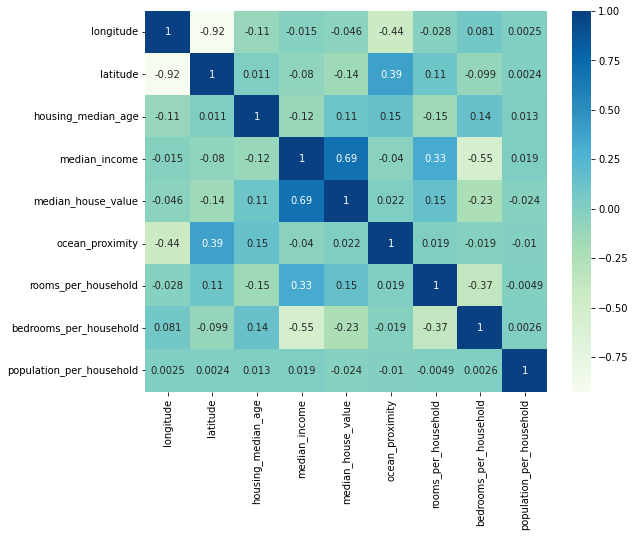

In [ ]:
# Show correlations between all features and the target variable. 
# We will use the Pearson Correlation method.
corr = houses.corr()
plt.figure(figsize = (9,7))
sns.heatmap(corr, annot = True, cmap = 'GnBu')

In [ ]:
# Split houseing data into training data and test data sets.
# We need to divide our data into x values (the data we will use to make predictions) 
# and y values (the data we are attempting to predict).
x_data = houses.drop('median_house_value', axis = 1)
y_data = houses['median_house_value']

In [ ]:
# Use train_test_split function to generate training data and test data. Test data set will be 20% of the original data set. 
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.20, random_state=2)

In [ ]:
# Normalize the feature datasets. StandardScaler will transform the data so that its distribution 
# will have a mean value 0 and standard deviation of 1. 
sc = StandardScaler()
x_training_data = sc.fit_transform(x_training_data)
x_test_data = sc.fit_transform(x_test_data)



**We will now train models, make predictions and evaluate the performance of five different models.** 

We will train five machine learning models with the goal of finding the best model that fits our data. We will use Root Mean Squared Error (RMSE) to measure the performance of the models. The root mean squared error is a metric that shows the average distance between the predicted values from the model and the actual values in the dataset. RMSE is found by calculating the residual (difference between prediction and truth) for each data point, compute the norm of residual for each data point, compute the mean of residuals and take the square root of that mean.  

**Linear Regression Model**

In [ ]:
# Create model object. 
model_lr = LinearRegression()
# Train the model on the training data.
model_lr.fit(x_training_data, y_training_data)
# Make predictions on the model using the test data.
# The predictions variable holds the predicted values of the features stored in x_test_data.
predictions_lr = model_lr.predict(x_test_data)


We will use Root Mean Squared Error (RMSE) to measure the performance of for the linear regression model. The root mean squared error is a metric that shows the average distance between the predicted values from the model and the actual values in the dataset. 

In [ ]:
# Show the root mean squared error (RMSE) for the linear regression model. The root mean squared error is a metric 
# that shows the average distance between the predicted values from the model and the actual values in the dataset.  
from sklearn.metrics import mean_squared_error  
lin_mse = mean_squared_error(y_test_data, predictions_lr) 
lin_rmse = np.sqrt(lin_mse) 
lin_rmse

74045.82617684643

The RMSE shows that the linear regression model has a typical prediction error of $74,045.  

**Gradiant Booster Model**

In [ ]:
# Create model object.
model_gb = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2, 
                                        learning_rate=0.1, loss='ls')
# Train the model on the training data.
model_gb.fit(x_training_data, y_training_data)
# Make predictions on the model using the test data.
predictions_gb = model_gb.predict(x_test_data)

Parameters setting definitions: 
*   n_estimator — The number of boosting stages to perform. We should not set it too high which would overfit our model.
*   max_depth — The depth of the tree node.
*   minimum sample split — Number of sample to be split for learning the data.
*   learning_rate — Rate of learning the data.
*   loss — loss function to be optimized. ‘ls’ refers to least squares regression.

In [ ]:
# Show the root mean squared error (RMSE) for the gradiant booster model. The root mean squared error is a metric 
# that shows the average distance between the predicted values from the model and the actual values in the dataset.   
from sklearn.metrics import mean_squared_error  
lin_mse = mean_squared_error(y_test_data, predictions_gb) 
lin_rmse = np.sqrt(lin_mse) 
lin_rmse

52627.52871368383

The RMSE shows that the gradiant booster model has a typical prediction error of $52,627.

---



**Decision Tree Model**

In [ ]:
# Create model object. 
model_dt = DecisionTreeRegressor(random_state=42)
# Train the model on the training data.
model_dt.fit(x_training_data, y_training_data)
# Make predictions on the model using the test data.
predictions_dt = model_dt.predict(x_test_data)

In [ ]:
# Show the root mean squared error (RMSE) for the decision tree model. The root mean squared error is a metric 
# that shows the average distance between the predicted values from the model and the actual values in the dataset.   
from sklearn.metrics import mean_squared_error  
lin_mse = mean_squared_error(y_test_data, predictions_dt) 
lin_rmse = np.sqrt(lin_mse) 
lin_rmse

78839.60896660246

The RMSE shows that the decision tree model has a typical prediction error of $78,839.

**Random Forrest Model**

In [ ]:
# Create model object. 
model_rf = RandomForestRegressor(n_estimators=30, max_features=2, random_state=42)   
# Train the model on the training data.
model_rf.fit(x_training_data, y_training_data)
# Make predictions on the model using the test data.
predictions_rf = model_rf.predict(x_test_data)

In [ ]:
# Show the root mean squared error (RMSE) for the random forrest model. The root mean squared error is a metric 
# that shows the average distance between the predicted values from the model and the actual values in the dataset.   
from sklearn.metrics import mean_squared_error  
lin_mse = mean_squared_error(y_test_data, predictions_rf) 
lin_rmse = np.sqrt(lin_mse) 
lin_rmse

52619.352410710504

The RMSE shows that the random forrest model has a typical prediction error of $52,619.



We will use Grid Search CV to fine tune the random forrest model.  

In [ ]:
# Using grid search to fine tune the random forest model.
from sklearn.model_selection import GridSearchCV
param_grid = [
    # Try 12 (3×4) combinations of hyperparameters.
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # Try 6 (2×3) combinations and set bootstrap to False.
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
rfg = RandomForestRegressor(random_state=42)
# Train across 5 folds, that's a total of (12+6)*5=90 rounds of training. 
grid_search = GridSearchCV(rfg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(x_training_data, y_training_data)
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

The grid search found the best parameters for max_features and n_estimators. We used these settings when we ran the random forrest model. 

**Support Vector Machine Model**

In [ ]:
# Create model object. 
model_svr = SVR(kernel="linear")
# Train the model on the training data.
model_svr.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_svr = model_svr.predict(x_test_data)

In [ ]:
# Show the root mean squared error (RMSE) for the support vector machine model. The root mean squared error is a metric 
# that shows the average distance between the predicted values from the model and the actual values in the dataset.   
from sklearn.metrics import mean_squared_error  
lin_mse = mean_squared_error(y_test_data, predictions_svr) 
lin_rmse = np.sqrt(lin_mse) 
lin_rmse

113099.26378949621

The RMSE shows that the support vector machine model has a typical prediction error of $113,099. 

Conclusions: The Random Forrest Model shows the best RMSE of $52,619, which is very good. We will now calculate the 95% confidence interval for this model which will show how much the error can fluctuate. The 95% confidence interval is a range of values that you can be 95% certain contains the true mean of the population. 


In [ ]:
# Calculate the 95% confidence interval.
from scipy import stats
confidence = 0.95
squared_errors = (predictions_rf - y_test_data) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc = squared_errors.mean(),
                         scale = stats.sem(squared_errors)))


array([50225.50426199, 54908.93568331])

This shows that the prediction error can fluctuate anywhere between
50,225 to 54,908. The confidence interval gap is around $4,700.


The models accuracy may be improved by adding new features and by tuning some of the models hyper parameters. This model can also be used to predict the house prices in any geographic location by fine tuning the features and parameters.